In [1]:
import pandas as pd
import numpy as np·
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
uploaded = files.upload()
#choose train.csv


Saving train.csv to train.csv


In [3]:
import io
data= pd.read_csv(io.BytesIO(uploaded['train.csv']))

#data EDA

In [7]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [9]:
mising_value=data.isnull().sum().sort_values(ascending=False)
percent= (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing=pd.concat([mising_value,percent],axis=1,keys=['number','percent'])
missing

,number,percent
Arrival Delay in Minutes,310,0.002984
Unnamed: 0,0,0.000000
Online boarding,0,0.000000
Departure Delay in Minutes,0,0.000000
Cleanliness,0,0.000000
Inflight service,0,0.000000
Checkin service,0,0.000000
Baggage handling,0,0.000000
Leg room service,0,0.000000
On-board service,0,0.000000


In [10]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
categorical_indexes

[0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

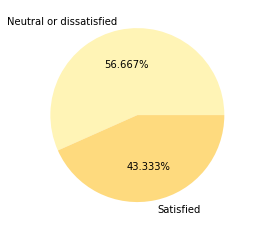

In [11]:
import seaborn as sns
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"),
        autopct = '%.3f%%')
pass

In [12]:
data=data.drop(data.iloc[:,[0,1]],axis=1)#drop useless columns --Unnamed: 0 and id


In [13]:
category=[0,1,3,4]+[i for i in range(6,20)]

In [14]:
# data['Gate location']
data.iloc[:,category]=data.iloc[:,category].astype('category')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

##numerical data EDA

In [19]:
corr_mat = data.corr()
corr_mat

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.002158,-0.002426
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.965481
Arrival Delay in Minutes,-0.012147,-0.002426,0.965481,1.000000


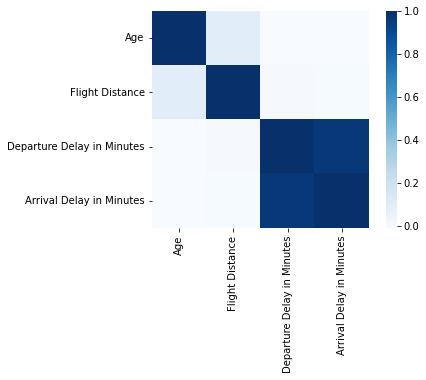

In [20]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')

there is a strong correlation between the features 'Departure delay in minutes' and 'Arrival delay in minutes'.

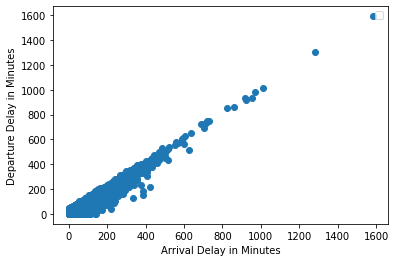

In [21]:
plt.scatter(x=data['Arrival Delay in Minutes'],y=data['Departure Delay in Minutes'])
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Departure Delay in Minutes')
plt.legend()

the scatter also shows strong relation between arrival delay time and departure delay time, and the scale of X and Y is symmetrical ,which make sense because the delay of arrival will direct cause the delay of next departure for same aircraft.Therefore, we may remove one of the them before build the model to avoid multicollinearity

## EDA between numerical and categorical feature

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

In [ ]:
Q1=data['Arrival Delay in Minutes'].quantile(0.25)
Q3=data['Arrival Delay in Minutes'].quantile(0.75)

In [ ]:
IQR=(Q3-Q1)
non_outlier_data=data.loc[(data['Arrival Delay in Minutes']>=Q1-1.5*IQR)&(data['Arrival Delay in Minutes']<=Q3+1.5*IQR)]

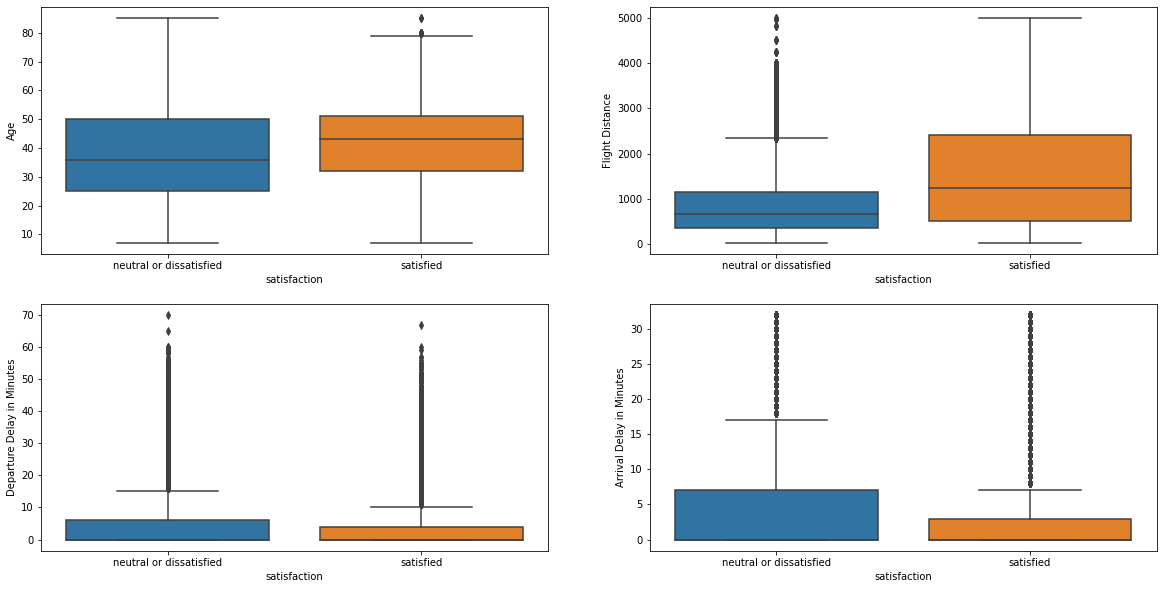

In [ ]:
figure,axss = plt.subplots(2,2, figsize=[20,10])
sns.boxplot(x='satisfaction',y='Age',data=data,ax=axss[0][0])
sns.boxplot(x='satisfaction',y='Flight Distance',data=data,ax=axss[0][1])
sns.boxplot(x='satisfaction',y='Departure Delay in Minutes',data=non_outlier_data,ax=axss[1][0])
sns.boxplot(x='satisfaction',y='Arrival Delay in Minutes',data=non_outlier_data,ax=axss[1][1])

older people more easier to satisfied, and customer who take longer distance fight tend to satisfied.Besides, after remove mathmatical outlier, we find there is no obvious difference of delay time for satisfied and dissatisfied customer.

##relation between satisfaction and class in numeric value 

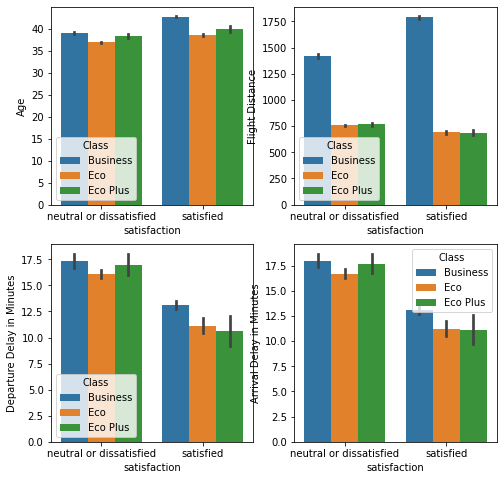

In [ ]:
figure ,axxs=plt.subplots(2,2,figsize=[8,8])#subplots 记得要加s  barplot x 轴是categorical 变量 y轴一定要是 numeric 变量
#hue 是categorical

sns.barplot(x='satisfaction',y='Age',hue='Class',data=data,ax=axxs[0][0])
sns.barplot(x='satisfaction',y='Flight Distance',hue='Class',data=data,ax=axxs[0][1])
sns.barplot(x='satisfaction',y='Departure Delay in Minutes',hue='Class',data=data,ax=axxs[1][0])
sns.barplot(x='satisfaction',y='Arrival Delay in Minutes',hue='Class',data=data,ax=axxs[1][1])

satisfaction seems did not dependent on calss , economy customer have young age


more fight distance more satisfaction and business class flight more distance


business class tend to satisfied than Eco plus customer when delay happends

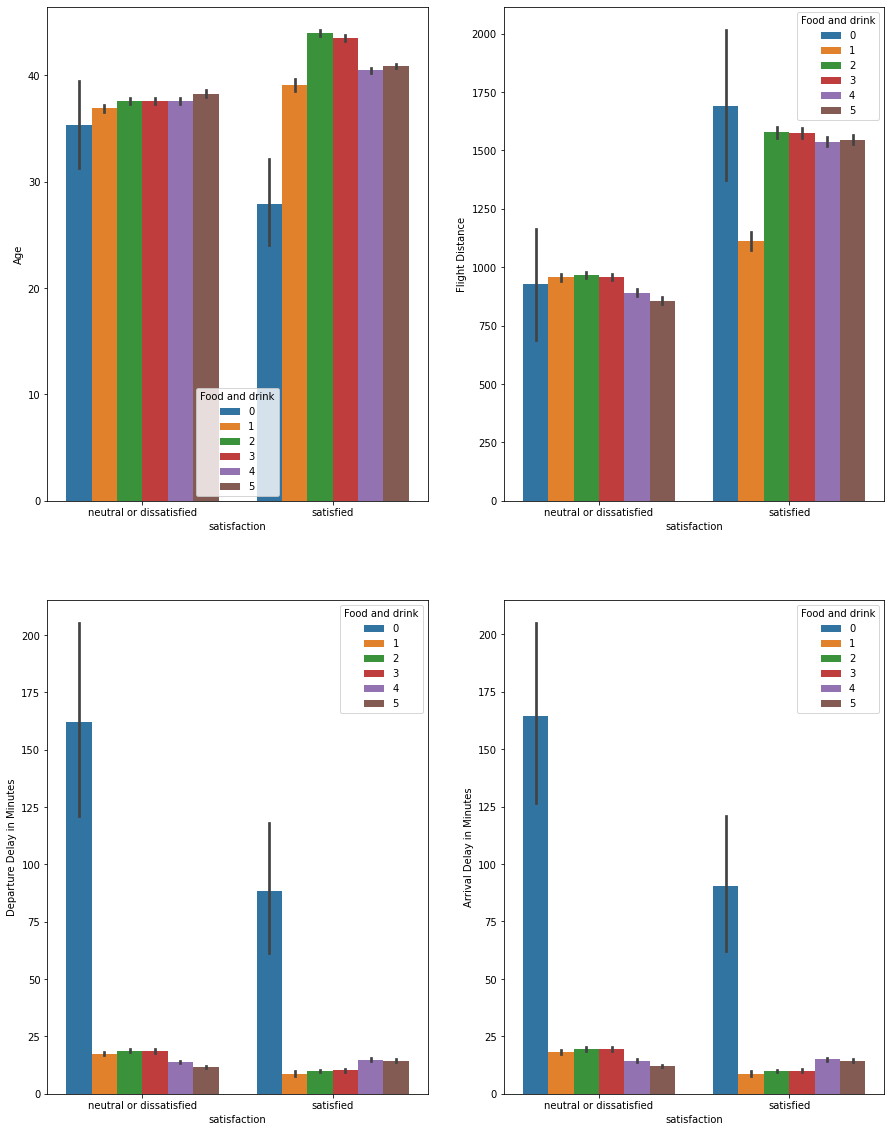

In [ ]:
figure ,axxs=plt.subplots(2,2,figsize=[15,20])
sns.barplot(x='satisfaction',y='Age',hue='Food and drink',data=data,ax=axxs[0][0])
sns.barplot(x='satisfaction',y='Flight Distance',hue='Food and drink',data=data,ax=axxs[0][1])
sns.barplot(x='satisfaction',y='Departure Delay in Minutes',hue='Food and drink',data=data,ax=axxs[1][0])
sns.barplot(x='satisfaction',y='Arrival Delay in Minutes',hue='Food and drink',data=data,ax=axxs[1][1])  

young age people did not satisfied by food 


long distance flight did not really satisfied by food even though they tend to satisfied by overall servcie.

customer who experienced delay more than 25 minutes tend to have higher food requirement

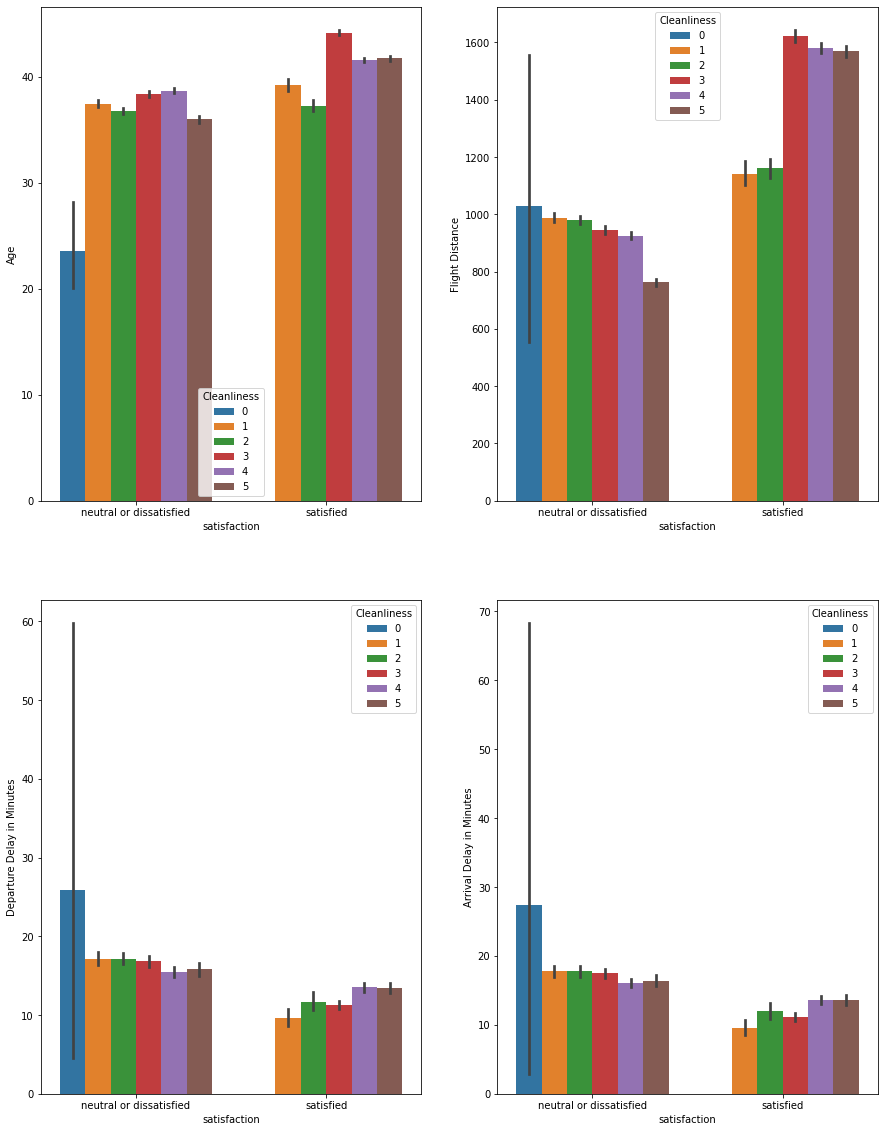

In [ ]:
figure ,axxs=plt.subplots(2,2,figsize=[15,20])
sns.barplot(x='satisfaction',y='Age',hue='Cleanliness',data=data,ax=axxs[0][0])
sns.barplot(x='satisfaction',y='Flight Distance',hue='Cleanliness',data=data,ax=axxs[0][1])
sns.barplot(x='satisfaction',y='Departure Delay in Minutes',hue='Cleanliness',data=data,ax=axxs[1][0])
sns.barplot(x='satisfaction',y='Arrival Delay in Minutes',hue='Cleanliness',data=data,ax=axxs[1][1])  

young age tend to have higher displine for cleanliness 

For satisfied customer their requirement for cleanliness increase with growth of flight distance 
/On the country or not satisfied customer their requirement for cleanliness decrease with growth of flight distance 

## EDA between categorical features

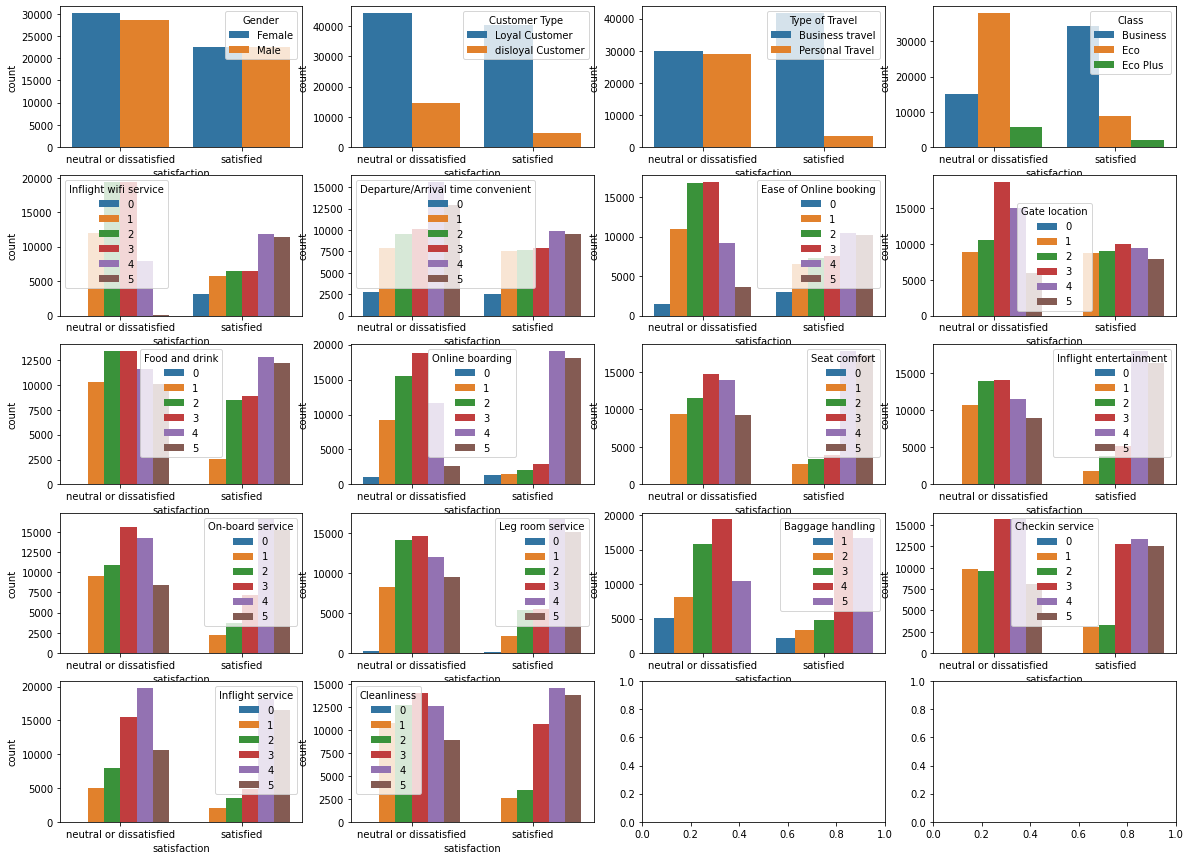

In [22]:
figure,axxs=plt.subplots(5,4,figsize=[20,15])
sns.countplot(x='satisfaction',hue='Gender',data=data,ax=axxs[0][0])

sns.countplot(x='satisfaction',hue='Customer Type',data=data,ax=axxs[0][1])

sns.countplot(x='satisfaction',hue='Type of Travel',data=data,ax=axxs[0][2])

sns.countplot(x='satisfaction',hue='Class',data=data,ax=axxs[0][3])



sns.countplot(x='satisfaction',hue='Inflight wifi service',data=data,ax=axxs[1][0])

sns.countplot(x='satisfaction',hue='Departure/Arrival time convenient',data=data,ax=axxs[1][1])

sns.countplot(x='satisfaction',hue='Ease of Online booking',data=data,ax=axxs[1][2])

sns.countplot(x='satisfaction',hue='Gate location',data=data,ax=axxs[1][3])



sns.countplot(x='satisfaction',hue='Food and drink',data=data,ax=axxs[2][0])

sns.countplot(x='satisfaction',hue='Online boarding',data=data,ax=axxs[2][1])

sns.countplot(x='satisfaction',hue='Seat comfort',data=data,ax=axxs[2][2])

sns.countplot(x='satisfaction',hue='Inflight entertainment',data=data,ax=axxs[2][3])




sns.countplot(x='satisfaction',hue='On-board service',data=data,ax=axxs[3][0])

sns.countplot(x='satisfaction',hue='Leg room service',data=data,ax=axxs[3][1])

sns.countplot(x='satisfaction',hue='Baggage handling',data=data,ax=axxs[3][2])
sns.countplot(x='satisfaction',hue='Checkin service',data=data,ax=axxs[3][3])




sns.countplot(x='satisfaction',hue='Inflight service',data=data,ax=axxs[4][0])

sns.countplot(x='satisfaction',hue='Cleanliness',data=data,ax=axxs[4][1])







business travel more easy to satisfied maybe because the cost of travel is paid,by company which make them less picky


eco and eco plus tend to not satisfied , as opposed to Buiness class


poor inflight service may contribute a lot to dissatisfaction


poor ease of online booking service may contribute a lot to dissatisfaction


poor food and drike service may contribute a lot to dissatisfaction

poor  online boarding service may contribute a lot to dissatisfaction

poor inflight entertainment  may contribute a lot to dissatisfaction

poor leg room  may contribute a lot to dissatisfaction

poor baggage handling  service may contribute a lot to dissatisfaction

poor cleanliness may contribute a lot to dissatisfaction

#fill NA value

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

In [24]:

data['Arrival Delay in Minutes']=data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median)

In [25]:
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# data preprocessing

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [27]:
data.drop(columns=['Arrival Delay in Minutes'],axis=1,inplace=True)

In [28]:
data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')

In [58]:
Y=data['satisfaction']
X=data.drop(['satisfaction'],axis=1)

In [59]:
le=LabelEncoder()

Y=le.fit_transform(Y)

In [60]:
cat_cols = X.columns[X.dtypes == 'category']
num_cols=X.columns[X.dtypes=='int64']

In [61]:
len(cat_cols)
len(num_cols)

3

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=48)


In [63]:
X_train[cat_cols]

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
86633,Female,Loyal Customer,Personal Travel,Eco,3,3,3,2,3,3,4,2,2,3,2,2,2,5
55226,Male,Loyal Customer,Business travel,Business,1,1,1,1,3,5,4,5,5,5,5,4,5,3
13881,Female,Loyal Customer,Personal Travel,Eco Plus,1,5,1,4,3,1,3,3,4,4,5,3,4,3
98209,Female,Loyal Customer,Personal Travel,Eco,4,3,4,3,3,3,4,2,2,4,2,4,2,1
67547,Male,Loyal Customer,Personal Travel,Eco Plus,4,5,4,3,5,4,5,5,5,5,4,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43355,Female,Loyal Customer,Business travel,Business,5,5,5,5,2,4,5,4,4,4,4,5,4,3
95684,Male,Loyal Customer,Business travel,Business,1,2,2,2,5,3,3,1,1,1,1,3,1,2
9553,Male,disloyal Customer,Business travel,Business,2,2,2,5,3,2,3,3,3,3,4,5,4,3
2611,Male,Loyal Customer,Personal Travel,Eco,1,4,1,2,2,1,2,2,5,5,5,5,5,2


##categorical data encoding

In [64]:
X_train=pd.get_dummies(X_train,columns=cat_cols)
X_test=pd.get_dummies(X_test,columns=cat_cols)

In [65]:
X_test

,Age,Flight Distance,Departure Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
58937,60,853,11,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
49461,11,2176,37,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
32813,34,1518,0,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
63790,27,569,0,1,0,0,1,1,0,1,...,0,0,1,0,0,1,0,0,0,0
74385,54,696,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,62,612,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
25377,43,1024,9,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
20495,38,363,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
17339,40,677,21,1,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [66]:
print(X_train.shape,X_test.shape)

(83123, 95) (20781, 95)


##numeric standalize

In [67]:
sca=StandardScaler()
sca.fit(X_train[num_cols])
X_train[num_cols]=sca.transform(X_train[num_cols])
X_test[num_cols]=sca.transform(X_test[num_cols])

In [68]:
print(X_train.shape,X_test.shape)

(83123, 95) (20781, 95)


In [69]:
X_train

,Age,Flight Distance,Departure Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
86633,0.966034,-0.861054,-0.177954,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
55226,0.635534,0.730310,-0.308643,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
13881,-1.744070,-0.358623,-0.047266,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
98209,1.627035,-0.122421,-0.387056,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
67547,0.040633,-0.213499,-0.387056,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43355,0.569433,0.299941,-0.387056,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
95684,-0.355968,-0.888077,-0.387056,0,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
9553,-0.884769,-0.550788,-0.387056,0,1,0,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2611,1.825335,-0.420677,-0.387056,0,1,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


# train model

In [70]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



In [71]:
from sklearn import neighbors
# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier(n_neighbors=6)

# Random Forest
classifier_RF = RandomForestClassifier()

In [72]:
# Train the model
classifier_logistic.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [73]:
classifier_logistic.predict(X_test)

array([0, 0, 1, ..., 0, 0, 1])

In [74]:
classifier_logistic.score(X_test,y_test)

0.9332082190462442

In [75]:
classifier_RF.fit(X_train, y_train)


RandomForestClassifier()

In [76]:
classifier_RF.score(X_test,y_test)

0.961647658919205

In [77]:
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [78]:
classifier_KNN.score(X_test,y_test)

0.9381646696501612

#find optimal hyper paramaters

In [79]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))



In [80]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the 1/lambda value(weight) for L1 and L2
# solver: algorithm to find the weights that minimize the cost function

# ('l1', 0.01)('l1', 0.05) ('l1', 0.1) ('l1', 0.2)('l1', 1)
# ('12', 0.01)('l2', 0.05) ('l2', 0.1) ('l2', 0.2)('l2', 1)
parameters = {
    'penalty':('l2','l1'), 
    'C':(0.01, 0.05, 0.1, 0.2,0.5,0.8,0.9,0.92,0.94,0.96,1)
}
Grid_LR =GridSearchCV(LogisticRegression(solver='liblinear'),parameters,cv=5)#solver 这个参数是代表logistics regression？

Grid_LR.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.92, 0.94,
                               0.96, 1),
                         'penalty': ('l2', 'l1')})

In [81]:
print_grid_search_metrics(Grid_LR)

Best score: 0.933965339720813
Best parameters set:
C:0.05
penalty:l1


In [82]:
best_LR_model = Grid_LR.best_estimator_
best_LR_model.predict(X_test)
best_LR_model.score(X_test, y_test)

0.9331600981665945

In [83]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9,11,13]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13]})

In [84]:
# best k
print_grid_search_metrics(Grid_KNN)
best_KNN_model = Grid_KNN.best_estimator_

Best score: 0.9364676351610498
Best parameters set:
n_neighbors:11


In [85]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [86]:
print_grid_search_metrics(Grid_RF)

Best score: 0.9434332361220665
Best parameters set:
max_depth:10
n_estimators:100


In [87]:
best_RF_model = Grid_RF.best_estimator_

In [88]:
best_RF_model

RandomForestClassifier(max_depth=10)

#performance evaluation

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


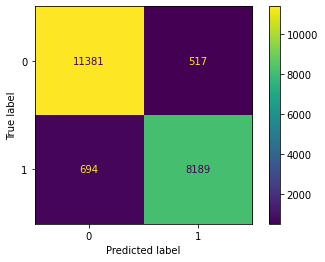

In [90]:
plot_confusion_matrix(best_RF_model,X_test,y_test)

In [91]:
classification_report(y_test,best_RF_model.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95     11898\n           1       0.94      0.92      0.93      8883\n\n    accuracy                           0.94     20781\n   macro avg       0.94      0.94      0.94     20781\nweighted avg       0.94      0.94      0.94     20781\n'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


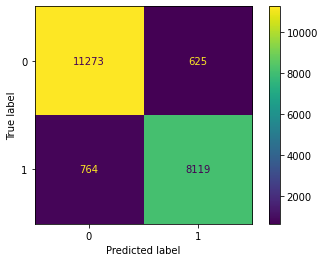

In [92]:
plot_confusion_matrix(best_LR_model,X_test,y_test)

In [93]:
best_LR_prediction=best_LR_model.predict(X_test)
classification_report(y_test,best_LR_prediction)

'              precision    recall  f1-score   support\n\n           0       0.94      0.95      0.94     11898\n           1       0.93      0.91      0.92      8883\n\n    accuracy                           0.93     20781\n   macro avg       0.93      0.93      0.93     20781\nweighted avg       0.93      0.93      0.93     20781\n'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


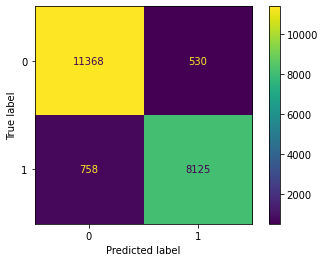

In [94]:
plot_confusion_matrix(best_KNN_model,X_test,y_test)

In [95]:
classification_report(y_test,best_KNN_model.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95     11898\n           1       0.94      0.91      0.93      8883\n\n    accuracy                           0.94     20781\n   macro avg       0.94      0.94      0.94     20781\nweighted avg       0.94      0.94      0.94     20781\n'

In [96]:
feature_imp_df = pd.DataFrame(list(zip(best_RF_model.feature_importances_, X_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df=feature_imp_df.sort_values(by='feature importance',ascending=False)


In [97]:
feature_imp_df.head(10)

,feature importance,feature
9,0.101691,Class_Business
47,0.073250,Online boarding_5
8,0.073136,Type of Travel_Personal Travel
7,0.071987,Type of Travel_Business travel
17,0.067111,Inflight wifi service_5
10,0.054732,Class_Eco
45,0.033616,Online boarding_3
5,0.031037,Customer Type_Loyal Customer
12,0.028328,Inflight wifi service_0
46,0.025000,Online boarding_4


In [98]:
coee_df=pd.DataFrame(data=best_LR_model.coef_.transpose(),index=X_train.columns,columns=['Coef'])

In [99]:
coee_df.sort_values(by=['Coef']).head(10)

,Coef
Type of Travel_Personal Travel,-3.710061
Customer Type_disloyal Customer,-3.136735
Inflight wifi service_3,-1.476546
Inflight wifi service_2,-1.467077
Inflight wifi service_1,-1.226163
Departure/Arrival time convenient_5,-1.046521
Seat comfort_3,-0.971095
Departure/Arrival time convenient_4,-0.791291
Inflight service_3,-0.674220
Checkin service_1,-0.627286
